<a href="https://colab.research.google.com/github/Um333r/Clustering-EastWestAirlines/blob/master/Clustering_EastWestAirlines.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Clustering Assignment**

**Data Set** : EastWestAirlines


1. Import Necessary libraries

In [1]:
import pandas as pd


2. Import Data


In [3]:
airline_details = pd.read_excel('EastWestAirlines (1).xlsx',sheet_name = 'data')
airline_details

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1
...,...,...,...,...,...,...,...,...,...,...,...,...
3994,4017,18476,0,1,1,1,8525,4,200,1,1403,1
3995,4018,64385,0,1,1,1,981,5,0,0,1395,1
3996,4019,73597,0,3,1,1,25447,8,0,0,1402,1
3997,4020,54899,0,1,1,1,500,1,500,1,1401,0


3. Data Understanding


In [4]:
airline_details.head()


,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1


In [5]:
airline_details.shape


(3999, 12)

In [6]:
airline_details.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3999 entries, 0 to 3998
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   ID#                3999 non-null   int64
 1   Balance            3999 non-null   int64
 2   Qual_miles         3999 non-null   int64
 3   cc1_miles          3999 non-null   int64
 4   cc2_miles          3999 non-null   int64
 5   cc3_miles          3999 non-null   int64
 6   Bonus_miles        3999 non-null   int64
 7   Bonus_trans        3999 non-null   int64
 8   Flight_miles_12mo  3999 non-null   int64
 9   Flight_trans_12    3999 non-null   int64
 10  Days_since_enroll  3999 non-null   int64
 11  Award?             3999 non-null   int64
dtypes: int64(12)
memory usage: 375.0 KB


In [7]:
airline_details.isna().sum()


ID#                  0
Balance              0
Qual_miles           0
cc1_miles            0
cc2_miles            0
cc3_miles            0
Bonus_miles          0
Bonus_trans          0
Flight_miles_12mo    0
Flight_trans_12      0
Days_since_enroll    0
Award?               0
dtype: int64

In [8]:
airline_details.describe()


,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
count,3999.000000,3.999000e+03,3999.000000,3999.000000,3999.000000,3999.000000,3999.000000,3999.00000,3999.000000,3999.000000,3999.00000,3999.000000
mean,2014.819455,7.360133e+04,144.114529,2.059515,1.014504,1.012253,17144.846212,11.60190,460.055764,1.373593,4118.55939,0.370343
std,1160.764358,1.007757e+05,773.663804,1.376919,0.147650,0.195241,24150.967826,9.60381,1400.209171,3.793172,2065.13454,0.482957
min,1.000000,0.000000e+00,0.000000,1.000000,1.000000,1.000000,0.000000,0.00000,0.000000,0.000000,2.00000,0.000000
25%,1010.500000,1.852750e+04,0.000000,1.000000,1.000000,1.000000,1250.000000,3.00000,0.000000,0.000000,2330.00000,0.000000
50%,2016.000000,4.309700e+04,0.000000,1.000000,1.000000,1.000000,7171.000000,12.00000,0.000000,0.000000,4096.00000,0.000000
75%,3020.500000,9.240400e+04,0.000000,3.000000,1.000000,1.000000,23800.500000,17.00000,311.000000,1.000000,5790.50000,1.000000
max,4021.000000,1.704838e+06,11148.000000,5.000000,3.000000,5.000000,263685.000000,86.00000,30817.000000,53.000000,8296.00000,1.000000


In [9]:
airline_details.dtypes


ID#                  int64
Balance              int64
Qual_miles           int64
cc1_miles            int64
cc2_miles            int64
cc3_miles            int64
Bonus_miles          int64
Bonus_trans          int64
Flight_miles_12mo    int64
Flight_trans_12      int64
Days_since_enroll    int64
Award?               int64
dtype: object


**4. CLUSTERING**

(a) HIERARCHICAL CLUSTERING


**STEP 1** = Data Pre-processing

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt  
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')


In [13]:
airline_details = pd.read_excel('EastWestAirlines (1).xlsx',sheet_name = 'data')
airline_details.head()

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1


In [14]:
from sklearn.preprocessing import MinMaxScaler


In [15]:
std_scaler_1 = MinMaxScaler()
x_1 = pd.DataFrame(std_scaler_1.fit_transform(airline_details.iloc[:,1:]))
x_1

,0,1,2,3,4,5,6,7,8,9,10
0,0.016508,0.0,0.00,0.0,0.0,0.000660,0.011628,0.000000,0.000000,0.843742,0.0
1,0.011288,0.0,0.00,0.0,0.0,0.000815,0.023256,0.000000,0.000000,0.839884,0.0
2,0.024257,0.0,0.00,0.0,0.0,0.015636,0.046512,0.000000,0.000000,0.847842,0.0
3,0.008667,0.0,0.00,0.0,0.0,0.001896,0.011628,0.000000,0.000000,0.837955,0.0
4,0.057338,0.0,0.75,0.0,0.0,0.164211,0.302326,0.067398,0.075472,0.835905,1.0
...,...,...,...,...,...,...,...,...,...,...,...
3994,0.010837,0.0,0.00,0.0,0.0,0.032330,0.046512,0.006490,0.018868,0.168917,1.0
3995,0.037766,0.0,0.00,0.0,0.0,0.003720,0.058140,0.000000,0.000000,0.167953,1.0
3996,0.043169,0.0,0.50,0.0,0.0,0.096505,0.093023,0.000000,0.000000,0.168797,1.0
3997,0.032202,0.0,0.00,0.0,0.0,0.001896,0.011628,0.016225,0.018868,0.168676,0.0


STEP 2 = Finding the optimal number of clusters using the Dendrogram :

In [16]:
from scipy.cluster.hierarchy import linkage 
import scipy.cluster.hierarchy as sch

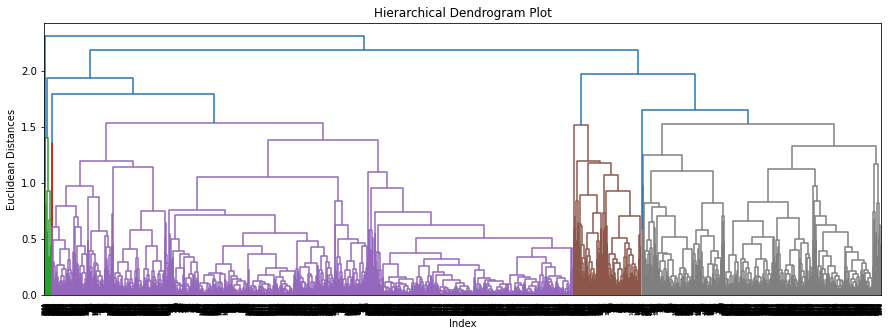

In [17]:
# create dendrogram
x = linkage(x_1, method = 'complete',metric = 'euclidean')

plt.figure(figsize = (15, 5))
plt.title('Hierarchical Dendrogram Plot')
plt.xlabel('Index')
plt.ylabel('Euclidean Distances')

sch.dendrogram(x)
plt.show()

STEP 3 = Training the hierarchical clustering model :

In [18]:
from sklearn.cluster import AgglomerativeClustering 


In [19]:
hc = AgglomerativeClustering(n_clusters = 5, linkage = 'complete',affinity = "euclidean").fit(x_1) 
hc

AgglomerativeClustering(linkage='complete', n_clusters=5)

In [20]:
x_hc = hc.fit_predict(x_1)
x_hc

array([0, 0, 0, ..., 2, 0, 0])

In [21]:
add_Clusters = pd.DataFrame(x_hc,columns = ['Clusters_1'])
add_Clusters.head()

,Clusters_1
0,0
1,0
2,0
3,0
4,1


In [22]:
airline_details['clusters_1'] = add_Clusters
airline_details.head() 

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,clusters_1
0,1,28143,0,1,1,1,174,1,0,0,7000,0,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1,1


STEP 4 = Visualizing the clusters :

In [23]:
airline_details[airline_details['clusters_1']==1]


,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,clusters_1
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1,1
11,12,96522,0,5,1,1,61105,19,0,0,6924,1,1
15,16,28495,0,4,1,1,49442,15,0,0,6912,1,1
16,17,51890,0,4,1,1,48963,16,0,0,6910,1,1
20,21,120576,0,5,1,1,58831,23,250,2,6896,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3753,3776,70178,0,5,1,1,61530,12,1300,6,3306,1,1
3772,3795,822321,0,5,1,1,138334,26,600,2,3288,1,1
3846,3869,97510,1678,5,1,1,71609,51,7650,26,1665,1,1
3855,3878,190730,0,5,1,1,78916,28,2450,9,1648,1,1


In [24]:
airline_details[airline_details['clusters_1']==2]

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,clusters_1
7,8,20856,0,1,1,1,5250,4,250,1,6938,1,2
8,9,443003,0,3,2,1,1753,43,3850,12,6948,1,2
9,10,104860,0,3,1,1,28426,28,1150,3,6931,1,2
17,18,13958,0,1,1,1,4291,5,0,0,6905,1,2
18,19,91473,0,3,1,1,27408,17,0,0,6903,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3987,4010,11933,0,1,1,1,249,3,79,1,1412,1,2
3989,4012,2622,0,1,1,1,1625,6,0,0,1404,1,2
3994,4017,18476,0,1,1,1,8525,4,200,1,1403,1,2
3995,4018,64385,0,1,1,1,981,5,0,0,1395,1,2


In [25]:
airline_details[airline_details['clusters_1']==3]

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,clusters_1
2015,2032,53232,888,4,1,1,80696,65,22100,45,3831,1,3
3235,3257,287033,0,1,1,1,26161,58,12873,53,2272,1,3
3583,3606,160114,500,1,1,1,71954,86,30817,53,1373,1,3
3594,3617,27619,0,4,1,1,83726,68,14050,46,1325,1,3


(b) K - MEANS


STEP 1 = Data Pre-processing :

In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt  
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [29]:
airline_details = pd.read_excel('EastWestAirlines (1).xlsx',sheet_name = 'data')
airline_details.head()

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1


In [28]:
from sklearn.preprocessing import StandardScaler


In [30]:
std_scaler_2 = StandardScaler()
x_2 = std_scaler_2.fit_transform(airline_details.iloc[:,1:])
print(x_2)

[[-4.51140783e-01 -1.86298687e-01 -7.69578406e-01 ... -3.62167870e-01
   1.39545434e+00 -7.66919299e-01]
 [-5.39456874e-01 -1.86298687e-01 -7.69578406e-01 ... -3.62167870e-01
   1.37995704e+00 -7.66919299e-01]
 [-3.20031232e-01 -1.86298687e-01 -7.69578406e-01 ... -3.62167870e-01
   1.41192021e+00 -7.66919299e-01]
 ...
 [-4.29480975e-05 -1.86298687e-01  6.83121167e-01 ... -3.62167870e-01
  -1.31560393e+00  1.30391816e+00]
 [-1.85606976e-01 -1.86298687e-01 -7.69578406e-01 ... -9.85033311e-02
  -1.31608822e+00 -7.66919299e-01]
 [-7.00507951e-01 -1.86298687e-01 -7.69578406e-01 ... -3.62167870e-01
  -1.31754109e+00 -7.66919299e-01]]


STEP 2 = Finding the optimal number of clusters using the Elbow Method :¶


In [31]:
from matplotlib import pyplot as plt
from sklearn.cluster import KMeans


In [32]:
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i,random_state = 0)
    kmeans.fit(x_2)
    wcss.append(kmeans.inertia_)
wcss

[43989.000000000015,
 35409.511452424376,
 30899.24682465222,
 27446.372456681347,
 24541.329582045757,
 21089.973628929638,
 19165.86145865565,
 17316.866446128264,
 16043.406242309495,
 14726.983322766802]

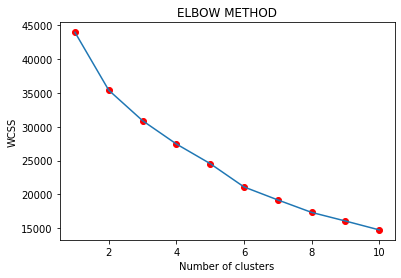

In [33]:

plt.plot(range(1, 11), wcss)
plt.scatter(range(1, 11), wcss,color = 'red')
plt.title('ELBOW METHOD')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()


STEP 3 = Training the K - means clustering model :

In [34]:
km = KMeans(6, random_state = 40)
km.fit(x_1)


KMeans(n_clusters=6, random_state=40)

In [35]:
km.labels_


array([4, 4, 4, ..., 1, 0, 0], dtype=int32)

In [36]:
airline_details['clusters_2'] = km.labels_
km.cluster_centers_

array([[ 1.94137515e-02,  8.44382696e-03,  1.76841085e-02,
         8.23643411e-03,  1.69573643e-03,  1.23045313e-02,
         7.17842978e-02,  6.90692719e-03,  1.13902296e-02,
         2.39980966e-01, -3.33066907e-16],
       [ 4.00536989e-02,  1.52189249e-02,  6.31853786e-01,
        -2.08166817e-17,  6.52741514e-04,  1.23136025e-01,
         2.17651345e-01,  1.82155063e-02,  3.21198089e-02,
         4.03697410e-01,  1.00000000e+00],
       [ 6.93891884e-02,  6.59020789e-03,  6.46035599e-01,
         8.09061489e-04,  5.66343042e-03,  1.19022293e-01,
         2.00383834e-01,  7.27197078e-03,  1.18458814e-02,
         5.32620376e-01, -3.33066907e-16],
       [ 4.89953609e-02,  2.60542873e-02,  3.90044577e-02,
         1.63447251e-02,  2.22882615e-03,  3.35642727e-02,
         1.21825219e-01,  3.34267751e-02,  5.94073285e-02,
         5.22892182e-01,  1.00000000e+00],
       [ 2.92823328e-02,  8.06451613e-03,  3.05299539e-02,
         9.79262673e-03,  2.88018433e-04,  1.31485480e-02,
  

In [37]:
airline_details.groupby('clusters_2').agg(['mean']).reset_index()


,clusters_2,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
,,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean
0,0,3204.917636,33097.301357,94.131783,1.070736,1.016473,1.006783,3244.520349,6.173450,212.850775,0.603682,1992.402132,0.0
1,1,2456.846753,68025.958442,168.779221,3.524675,1.000000,1.002597,32376.987013,18.688312,558.431169,1.693506,3364.901299,1.0
2,2,1840.462783,118297.325243,73.467638,3.584142,1.001618,1.022654,31384.393204,17.233010,224.100324,0.627832,4419.553398,0.0
3,3,1904.763744,83529.153046,290.453195,1.156018,1.032689,1.008915,8850.395245,10.476969,1030.112927,3.148588,4338.867756,1.0
4,4,1183.362903,49921.633641,89.903226,1.122120,1.019585,1.001152,3467.074885,6.913594,243.834101,0.728111,5567.925115,0.0
5,5,844.990544,144989.255319,225.238771,4.271868,1.002364,1.047281,57653.576832,21.579196,855.075650,2.550827,6227.356974,1.0


STEP 4 = Visualizing the clusters :


In [38]:
airline_details[airline_details['clusters_2']==1]


,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,clusters_2
647,656,25835,0,3,1,1,15153,15,0,0,6142,1,1
759,769,43179,0,3,1,1,11915,6,0,0,6214,1,1
768,778,10978,0,3,1,1,14313,11,0,0,6193,1,1
803,813,66122,0,3,1,1,11756,13,0,0,5630,1,1
805,815,42044,2253,3,1,1,11433,10,0,0,6140,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3931,3954,49519,0,3,1,1,25762,18,0,0,1522,1,1
3954,3977,33972,0,3,1,1,21029,29,0,0,1467,1,1
3973,3996,72297,0,3,1,1,16241,16,0,0,1587,1,1
3979,4002,57793,0,3,1,1,20959,15,1198,3,1424,1,1


In [39]:
airline_details[airline_details['clusters_2']==2]


,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,clusters_2
6,7,84914,0,3,1,1,27482,25,0,0,6994,0,2
30,31,177926,0,3,1,1,20797,13,0,0,7886,0,2
32,33,276571,0,4,1,1,42044,23,0,0,7872,0,2
44,45,121260,0,3,1,1,18493,18,0,0,7808,0,2
56,57,75971,0,4,1,1,34339,14,0,0,6869,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3966,3989,91605,0,4,1,1,37840,18,0,0,1444,0,2
3974,3997,58387,0,3,1,1,14581,39,0,0,1435,0,2
3980,4003,28867,0,3,1,1,19169,28,0,0,1425,0,2
3985,4008,59017,0,4,1,1,34746,25,0,0,1418,0,2


In [40]:
airline_details[airline_details['clusters_2']==3]


,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,clusters_2
7,8,20856,0,1,1,1,5250,4,250,1,6938,1,3
17,18,13958,0,1,1,1,4291,5,0,0,6905,1,3
21,22,185681,2024,1,1,1,13300,16,1800,9,6896,1,3
29,30,19221,0,1,1,1,4655,8,500,1,7896,1,3
36,37,23193,0,1,1,1,650,4,550,3,7861,1,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3978,4001,10071,0,2,1,1,27701,16,0,0,1421,1,3
3987,4010,11933,0,1,1,1,249,3,79,1,1412,1,3
3989,4012,2622,0,1,1,1,1625,6,0,0,1404,1,3
3994,4017,18476,0,1,1,1,8525,4,200,1,1403,1,3


(c) DBSCAN


STEP 1 = Data Pre-processing :


In [41]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt  
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')


In [44]:
airline_details = pd.read_excel('EastWestAirlines (1).xlsx',sheet_name = 'data')
airline_details.head()


,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1


In [43]:
df = pd.DataFrame(airline_details)
df.head()

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,clusters_2
0,1,28143,0,1,1,1,174,1,0,0,7000,0,4
1,2,19244,0,1,1,1,215,2,0,0,6968,0,4
2,3,41354,0,1,1,1,4123,4,0,0,7034,0,4
3,4,14776,0,1,1,1,500,1,0,0,6952,0,4
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1,5


In [45]:
df.columns


Index(['ID#', 'Balance', 'Qual_miles', 'cc1_miles', 'cc2_miles', 'cc3_miles',
       'Bonus_miles', 'Bonus_trans', 'Flight_miles_12mo', 'Flight_trans_12',
       'Days_since_enroll', 'Award?', 'clusters_2'],
      dtype='object')

In [46]:
df1 = df.drop(['cc1_miles', 'cc2_miles', 'cc3_miles','ID#','Award?'],axis = 1)
df1.head()

,Balance,Qual_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,clusters_2
0,28143,0,174,1,0,0,7000,4
1,19244,0,215,2,0,0,6968,4
2,41354,0,4123,4,0,0,7034,4
3,14776,0,500,1,0,0,6952,4
4,97752,0,43300,26,2077,4,6935,5


STEP 2 = Finding the optimal number of clusters using the DBSCAN :

In [47]:
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler

In [48]:
std_scaler_3 = StandardScaler().fit(df1)
x_3 = std_scaler_3.transform(df1)
x_3

array([[-4.51140783e-01, -1.86298687e-01, -7.02786266e-01, ...,
        -3.62167870e-01,  1.39545434e+00,  9.73608250e-01],
       [-5.39456874e-01, -1.86298687e-01, -7.01088399e-01, ...,
        -3.62167870e-01,  1.37995704e+00,  9.73608250e-01],
       [-3.20031232e-01, -1.86298687e-01, -5.39252702e-01, ...,
        -3.62167870e-01,  1.41192021e+00,  9.73608250e-01],
       ...,
       [-4.29480975e-05, -1.86298687e-01,  3.43803696e-01, ...,
        -3.62167870e-01, -1.31560393e+00, -7.51960989e-01],
       [-1.85606976e-01, -1.86298687e-01, -6.89286154e-01, ...,
        -9.85033311e-02, -1.31608822e+00, -1.32715074e+00],
       [-7.00507951e-01, -1.86298687e-01, -7.09991847e-01, ...,
        -3.62167870e-01, -1.31754109e+00, -1.32715074e+00]])

STEP 3 = Training the DBSCAN clustering model :

In [49]:
db = DBSCAN(eps = 0.45,min_samples = 5)
db.fit(x_3)

DBSCAN(eps=0.45)

In [50]:
db.labels_


array([0, 0, 0, ..., 5, 8, 8])

In [51]:
df2 = pd.DataFrame(db.labels_,columns = ['clusters_3'])
df2.head()


,clusters_3
0,0
1,0
2,0
3,0
4,-1


In [52]:
airline_details['clusters_3'] = df2['clusters_3']
airline_details.head()

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,clusters_3
0,1,28143,0,1,1,1,174,1,0,0,7000,0,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1,-1


In [53]:
df2.clusters_3.value_counts()


-1     1490
 8      888
 0      675
 3      319
 1      298
 5      187
 2       68
 4       10
 11       9
 7        8
 15       7
 9        7
 13       7
 12       6
 16       6
 14       5
 6        5
 10       4
Name: clusters_3, dtype: int64

In [54]:
airline_details.groupby(['clusters_3']).agg(['mean']).reset_index()


,clusters_3,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
,,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean
0,-1,1744.959732,132518.506711,386.787919,2.715436,1.018121,1.032215,31573.995302,17.563758,1156.060403,3.387919,4655.070470,0.588591
1,0,1197.047407,34611.551111,0.000000,1.105185,1.017778,1.000000,2587.125926,5.565926,41.711111,0.155556,5512.484444,0.000000
2,1,2054.302013,26987.013423,0.000000,1.187919,1.023490,1.000000,4768.241611,6.885906,62.651007,0.228188,4040.513423,1.000000
3,2,590.897059,42453.985294,0.000000,3.602941,1.000000,1.000000,29904.132353,15.735294,45.823529,0.147059,6669.867647,1.000000
4,3,1865.777429,81075.529781,0.000000,3.291536,1.000000,1.003135,23136.959248,14.636364,19.413793,0.084639,4289.965517,0.000000
5,4,446.100000,126530.700000,0.000000,3.000000,1.000000,1.000000,19374.000000,14.700000,10.000000,0.100000,6976.200000,1.000000
6,5,2334.556150,38693.133690,0.000000,3.358289,1.000000,1.000000,25177.128342,14.754011,41.711230,0.149733,3605.176471,1.000000
7,6,1322.000000,131626.600000,0.000000,5.000000,1.000000,1.000000,64918.200000,15.400000,50.000000,0.200000,5245.400000,1.000000
8,7,1187.500000,65446.125000,0.000000,4.875000,1.000000,1.000000,56908.250000,15.750000,18.750000,0.125000,5483.875000,1.000000


STEP 4 = Visualizing the clusters :

In [55]:
airline_details[airline_details['clusters_3']==3]


,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,clusters_3
44,45,121260,0,3,1,1,18493,18,0,0,7808,0,3
56,57,75971,0,4,1,1,34339,14,0,0,6869,0,3
60,61,134457,0,3,1,1,15588,14,0,0,6861,0,3
67,68,83237,0,4,1,1,35287,18,0,0,6837,0,3
75,78,129871,0,3,1,1,15776,22,0,0,7752,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3891,3914,85696,0,3,1,1,18603,14,0,0,1591,0,3
3892,3915,134882,0,3,1,1,15717,14,0,0,1597,0,3
3899,3922,90666,0,4,1,1,32474,14,0,0,1582,0,3
3948,3971,35509,0,3,1,1,14204,13,0,0,1486,0,3


In [56]:
airline_details[airline_details['clusters_3']==2]


,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,clusters_3
15,16,28495,0,4,1,1,49442,15,0,0,6912,1,2
16,17,51890,0,4,1,1,48963,16,0,0,6910,1,2
18,19,91473,0,3,1,1,27408,17,0,0,6903,1,2
28,29,59763,0,3,1,1,33772,20,100,1,7907,1,2
38,39,59990,0,3,1,1,27878,17,0,0,7854,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1168,1180,94896,0,4,1,1,38127,15,500,1,5602,1,2
1169,1181,12091,0,4,1,1,29271,15,0,0,5609,1,2
1358,1371,23890,0,4,1,1,35574,19,0,0,5031,1,2
1438,1452,61919,0,4,1,1,39163,14,350,1,5157,1,2


In [57]:
airline_details[airline_details['clusters_3']==1]


,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,clusters_3
7,8,20856,0,1,1,1,5250,4,250,1,6938,1,1
17,18,13958,0,1,1,1,4291,5,0,0,6905,1,1
39,40,2176,0,1,1,1,0,0,0,0,7847,1,1
47,48,36924,0,1,1,1,5900,6,300,2,6879,1,1
57,58,36298,0,1,1,1,3100,5,600,3,6865,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3944,3967,2124,0,1,1,1,2324,2,0,0,1487,1,1
3987,4010,11933,0,1,1,1,249,3,79,1,1412,1,1
3989,4012,2622,0,1,1,1,1625,6,0,0,1404,1,1
3994,4017,18476,0,1,1,1,8525,4,200,1,1403,1,1
